## Redes Convolucionales para reconocimiento de imágenes

## Actividad calificada por el personal

### Propósito 

En el laboratorio "Implementación de Redes Convolucionales en Keras" se propuso una implementación a través de *"Keras"* de una red convolucional para una base de datos que contiene imágenes de dígitos manuscritos. En este *notebook* se pretende evaluar el uso de *keras* al aplicar una red convolucional sobre un conjunto de imágenes más complejo, "Fashion MNIST". 

### Instrucciones generales

1. Los procedimientos en el notebook deberán responderse en los espacios especificados para tal fin, debajo de cada uno de los puntos.

2. Para que la actividad sea calificada, deberán subir únicamente este mismo archivo con la extensión ".ipynb" a la actividad de "entrega calificada por el personal" correspondiente a este caso.

3. El archivo que suban debe poder ejecutarse en una imagen de Coursera cuando sea evaluado por el tutor, asumiendo que la base de datos de la actividad ya ha sido importada en el correspondiente archivo separado por comas (.csv).

### Criterios a evaluar

Los criterios que se evaluarán son:

Preparación de las variables: Se adaptan los datos apropiadamente para el uso de las funciones de `keras` y realiza la partición de la muestra en entrenamiento, validación y test. [15 puntos]

Estimación de un modelo utilizando redes neuronales convolucionales: Se estima el modelo usando una CNN, se establecen los parámetros y estructuras apropiadamente, se evalúa en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [45 puntos]

Calidad de la predicción: La arquitectura implementada posee un buen desempeño entre el nivel de precisión obtenido y el tiempo de ejecución. Asegúrese de no implementar una red excesivamente profunda probándola en los servidores que ofrece la plataforma Coursera, pues con estos realizamos la calificaciónde su solución. [40 puntos]


#### Problema

Fashion-MNIST es una base de datos de imágenes de artículos de la tienda de ropa Zalando, que consta de un set de entrenamiento de 60000 muestras y un set de test de 10000 muestras. Cada dato es una imagen en escala de grises de una prenda de vestir, asociada con una etiqueta de 10 clases.

Ustedes deben proponer el algoritmo para hacer la clasificación de las prendas con una red neuronal convolucional.

### Librerías a importar

In [14]:
import numpy as np
import matplotlib.pyplot as plt
#Las siguientes dos líneas evitan la generación de "warnings" y "flags" al importar keras y tensorflow.
#Dichas advertencias no comprometen el funcionamiento del código.
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
#Importación de keras
import keras
import tensorflow as tf
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import AveragePooling2D

### 1. Preparación de las variables (15 puntos)

Adapte los datos apropiadamente para el uso de las funciones de `keras` y realiza la partición de la muestra en entrenamiento, validación y test.

In [2]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
print('Dimensiones de los datos de Training: ', x_train.shape, y_train.shape)
print('Dimensiones de los datos de Testing: ', x_test.shape, y_test.shape)

Dimensiones de los datos de Training:  (60000, 28, 28) (60000,)
Dimensiones de los datos de Testing:  (10000, 28, 28) (10000,)


In [4]:
classes = np.unique(y_train)
nClasses = len(classes)
print('Número total de clases: ', nClasses)
print('Clases/labels: ', classes)

Número total de clases:  10
Clases/labels:  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Label : 9')

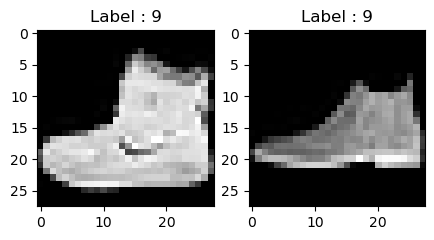

In [5]:
plt.figure(figsize=[5,5])
# Visualiza la primera imagen en la base de training
plt.subplot(121)
plt.imshow(x_train[0,:,:], cmap='gray')
plt.title("Label : {}".format(y_train[0]))

# Visualiza la primera imagen en la base de testing
plt.subplot(122)
plt.imshow(x_test[0,:,:], cmap='gray')
plt.title("Label : {}".format(y_test[0]))

In [8]:
train_X = x_train.astype('float32')
test_X = x_test.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

In [ ]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, y_train, test_size=0.2, random_state=1324)
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

In [10]:
image_rows = train_X.shape[1]
image_cols = train_X.shape[2]
train_X = train_X.reshape(-1,image_rows,image_cols, 1)
test_X = test_X.reshape(-1,image_rows,image_cols, 1)
train_X.shape, test_X.shape

((48000, 28, 28, 1), (10000, 28, 28, 1))

In [12]:
# Visualizar las dimensiones después de la partición
print('Dimensiones de train_X:', train_X.shape)
print('Dimensiones de valid_X:', valid_X.shape)
print('Dimensiones de train_label:', train_label.shape)
print('Dimensiones de valid_label:', valid_label.shape)

Dimensiones de train_X: (48000, 28, 28, 1, 1)
Dimensiones de valid_X: (12000, 28, 28, 1, 1)
Dimensiones de train_label: (48000,)
Dimensiones de valid_label: (12000,)


Lo que se hizo anteriormente fue cargar los datos de la base Fashion-MNI disponibles en el paquete `tensorflow-keras`,la base de datos está dividida originalmente en una sección de train y otra de test, las imágenes estan codificadas como arreglos de numpy, y los labels son un arreglo de digitos de 0 a 9; vemos que es una base de 60.000 imágenes en escala de grises de 28x28 de 10 categorías de moda, junto con un conjunto de prueba de 10.000 imágenes.

Se visualizan anteriormente algunas imagenes de la base, se subdividen los datos de entrenamiento para obtener los datos requeridos para la calibración de pesos de la red y los datos de validación y se ajustan las dimensiones de los datos para que puedan ser trabajadas por las funciones de `keras`. 

### 2. Estimación de un modelo utilizando redes neuronales convolucionales (45 puntos)

Estimen un modelo predictivo usando la muestra de entrenamiento y establezcan apropiadamente cada uno de los parámetros de la red.

In [15]:
digits_model = Sequential()
digits_model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(image_rows,image_cols,1),padding='same'))
digits_model.add(MaxPooling2D((2, 2),padding='same'))
digits_model.add(Dropout(0.2))
digits_model.add(Flatten())
digits_model.add(Dense(64, activation='relu'))               
digits_model.add(Dense(nClasses, activation='softmax'))

In [16]:
digits_model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.01),metrics =['accuracy'])
digits_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 64)                401472    
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                        

In [17]:
batch_size = 4800
epochs = 25
digits_train = digits_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/25
10/10 [==============================] - 32s 3s/step - loss: 2.3034 - accuracy: 0.1076 - val_loss: 2.2984 - val_accuracy: 0.1002
Epoch 2/25
10/10 [==============================] - 30s 3s/step - loss: 2.2857 - accuracy: 0.1973 - val_loss: 2.2565 - val_accuracy: 0.3378
Epoch 3/25
10/10 [==============================] - 30s 3s/step - loss: 2.2009 - accuracy: 0.2735 - val_loss: 2.0950 - val_accuracy: 0.3925
Epoch 4/25
10/10 [==============================] - 31s 3s/step - loss: 1.9598 - accuracy: 0.4021 - val_loss: 1.7649 - val_accuracy: 0.4442
Epoch 5/25
10/10 [==============================] - 30s 3s/step - loss: 1.6358 - accuracy: 0.4449 - val_loss: 1.5243 - val_accuracy: 0.4197
Epoch 6/25
10/10 [==============================] - 31s 3s/step - loss: 1.3902 - accuracy: 0.5135 - val_loss: 1.2609 - val_accuracy: 0.5878
Epoch 7/25
10/10 [==============================] - 30s 3s/step - loss: 1.1940 - accuracy: 0.5858 - val_loss: 1.1057 - val_accuracy: 0.6057
Epoch 8/25
10/10 [==

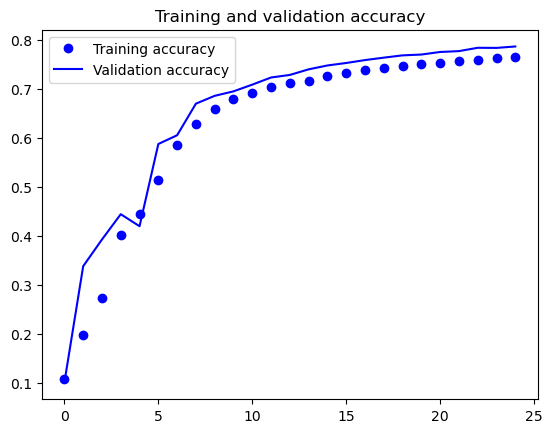

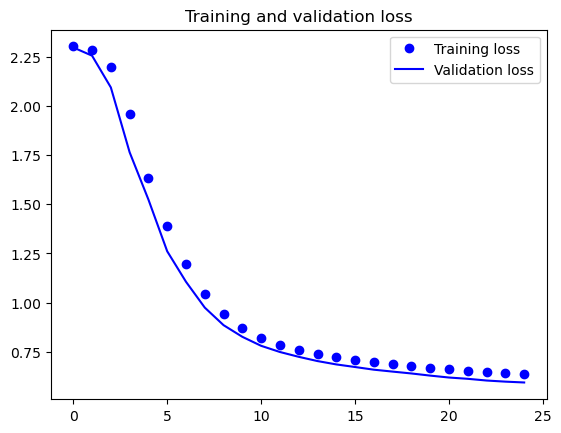

In [18]:
accuracy = digits_train.history['accuracy']
val_accuracy = digits_train.history['val_accuracy']
loss = digits_train.history['loss']
val_loss = digits_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 2)

### 3. Calidad de la predicción (40 puntos)

Evalúe el desempeño de su algoritmo con el set de _test_ y argumente sobre el nivel de precisión obtenido, tiempo de ejecución y la arquitectura de su red convolucional.

In [19]:
test_eval = digits_model.evaluate(test_X, y_test, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.6061295866966248
Test accuracy: 0.7806000113487244


In [ ]:
predicted_classes = digits_model.predict(test_X)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
correct = np.where(predicted_classes==y_test)[0]
test="Se encontraron %s labels correctos" % len(correct)
print(test) 
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
plt.tight_layout()

(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 3)